курсовая работа

Зарплаты в San Francisco
https://www.kaggle.com/kaggle/sf-salaries?select=Salaries.csv 

Как со временем менялись зарплаты между разными группами (группировка по Department - fire, medicine, police)? 
(максимальная, медианная, средняя)
Как распределяются базовая оплата, сверхурочная работа и льготы между разными группами? Нужно построить диаграммы по распределению со временем для каждого департамента по базовым, сверхурочным и льготам
Как распределяется бюджет на разные группы (department) с течением времени?
Какое количество людей в каждом департаменте? 
Какое количество с разным уровнем дохода? (гистограмма с шагом в 5к) 
На базе линейной регрессии постройте прогноз по тому, какие будут закупки на следующий год по каждому департаменту


In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

from scipy.stats import cosine
import matplotlib.pyplot as plt
import csv
import sys

import requests


from scipy import stats

In [27]:
#df = list(csv.DictReader(open('Salaries.csv', encoding='utf-8', newline='')))  #telecom_churn.csv
#url = f'https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing/telecom_churn.csv'
#url=f'https://www.kaggle.com/kaggle/sf-salaries?select=Salaries.csv'
df = pd.read_csv('Salaries.csv')
df.head(15)


C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (3,4,5,6,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
5,6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602,8601,189083,NaN,316285.74,316285.74,2011,NaN,San Francisco,NaN
6,7,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492,89062.9,134426,NaN,315981.05,315981.05,2011,NaN,San Francisco,NaN
7,8,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,256577,0,51322.5,NaN,307899.46,307899.46,2011,NaN,San Francisco,NaN
8,9,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)",176933,86362.7,40132.2,NaN,303427.55,303427.55,2011,NaN,San Francisco,NaN
9,10,JOANNE HAYES-WHITE,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",285262,0,17115.7,NaN,302377.73,302377.73,2011,NaN,San Francisco,NaN


In [165]:
#df = pd.read_csv(url,index_col=0,parse=True)
#df.head()

TypeError: parser_f() got an unexpected keyword argument 'parse'

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


In [231]:
df.shape

(148654, 13)

In [4]:
df.isna().sum()  # Benefits - ПРЕИМУЩЕСТВА ??? прверяем на наличие NaN в общей базе

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                605
OvertimePay              0
OtherPay                 0
Benefits             36159
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              110535
dtype: int64

In [148]:
df.groupby(['BasePay'])['BasePay'].count() #проверяю количество нулей, отрицательных значений, и др.


BasePay
14.25      1
15.83      3
17.48      1
18.81      1
23.08      1
          ..
9987.04    1
9991.53    1
9997.15    1
9998.60    1
9999.59    1
Name: BasePay, Length: 109886, dtype: int64

In [28]:
# удаляем Not Provided - не предоставлено
df = df.drop(df[df.BasePay =='Not Provided'].index)


In [29]:
# переводим сумму float и удаляем все отрицательные и нулевые суммы
df = df.drop(df[df.BasePay.astype(float) <=0.0].index)


In [195]:
# меняем все пустоты NaN на значение медианы 
df.fillna(df.BasePay.median(),inplace = True) 
#df['BasePay']=df['BasePay'].fillna(df.BasePay.median(),inplace=True)

In [204]:
df

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,167411.18,167411.18,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,155966.02,155966.02,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,212739.13,212739.13,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,77916.00,77916.00,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,134401.60,134401.60,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148613,148614,Nanette M Lloyd,Special Nurse,19.97,19.97,19.97,4.30,19.97,24.27,2014,NaN,San Francisco,PT
148616,148617,Afakasi O Afakasi,Public Service Trainee,21.48,21.48,21.48,0.22,22.34,22.56,2014,NaN,San Francisco,PT
148617,148618,Charles F Williams Iii,Pool Lifeguard,17.26,17.26,17.26,4.04,17.26,21.30,2014,NaN,San Francisco,PT
148619,148620,Ian V Cameron,IS Program Analyst-Assistant,6.04,6.04,6.04,2.30,16.09,18.39,2014,NaN,San Francisco,PT


df['BasePay'] = df['BasePay'].str.replace('%','').astype(np.float64)
df['OvertimePay'] = df['OvertimePay'].str.replace('%','').astype(np.float64)
df['OtherPay'] = df['OtherPay'].str.replace('%','').astype(np.float64)


In [30]:
df['BasePay']=df.BasePay.astype(float)
df['OvertimePay']=df.BasePay.astype(float)
df['OtherPay']=df.BasePay.astype(float)

In [203]:
df['BasePay']

0         167411.18
1         155966.02
2         212739.13
3          77916.00
4         134401.60
            ...    
148613        19.97
148616        21.48
148617        17.26
148619         6.04
148620        15.50
Name: BasePay, Length: 147341, dtype: float64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147341 entries, 0 to 148620
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                147341 non-null  int64  
 1   EmployeeName      147341 non-null  object 
 2   JobTitle          147341 non-null  object 
 3   BasePay           146736 non-null  float64
 4   OvertimePay       146736 non-null  float64
 5   OtherPay          146736 non-null  float64
 6   Benefits          111634 non-null  object 
 7   TotalPay          147341 non-null  float64
 8   TotalPayBenefits  147341 non-null  float64
 9   Year              147341 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            147341 non-null  object 
 12  Status            37693 non-null   object 
dtypes: float64(6), int64(2), object(5)
memory usage: 15.7+ MB


In [160]:
#проверить на корретность полей, базовая оплата базовая оплата - очень маленький %, можно удалить
df.BasePay.value_counts(normalize=True) 

54703.00     0.002303
55026.00     0.002024
48472.40     0.001431
65448.00     0.001043
121068.00    0.001036
               ...   
48249.89     0.000007
20487.14     0.000007
53546.01     0.000007
1607.00      0.000007
7611.73      0.000007
Name: BasePay, Length: 109477, dtype: float64

In [81]:
#проверить на корретность полей, другие значения - Оплата сверхурочной работы -- очень маленький %, можно удалить
df.OvertimePay.value_counts(normalize=True) 

0.0        0.4
0.00       0.1
681.23     0.0
10.68      0.0
152.13     0.0
            ..
976.26     0.0
571.51     0.0
35515.23   0.0
302.89     0.0
38043.49   0.0
Name: OvertimePay, Length: 66484, dtype: float64

In [161]:
df.groupby(['OvertimePay'])['OvertimePay'].count() #проверяю количество нулей, отрицательных значений, и др.

OvertimePay
6.04         1
14.25        1
15.50        1
15.83        3
17.26        1
            ..
313312.52    1
313686.01    1
315572.01    1
318835.49    1
319275.01    1
Name: OvertimePay, Length: 109477, dtype: int64

In [32]:
# переводим сумму float и удаляем все отрицательные и нулевые суммы
df = df.drop(df[df.OvertimePay.astype(float) <=0.0].index)

In [207]:
#проверить на корретность полей, другие значения - другое - льготы-- очень маленький %, можно удалить
df.OtherPay.value_counts(normalize=True) 

54703.00     0.002303
55026.00     0.002024
48472.40     0.001431
65448.00     0.001043
121068.00    0.001036
               ...   
48249.89     0.000007
20487.14     0.000007
53546.01     0.000007
1607.00      0.000007
7611.73      0.000007
Name: OtherPay, Length: 109477, dtype: float64

In [33]:
# переводим сумму float и удаляем все отрицательные и нулевые суммы
df = df.drop(df[df.OtherPay.astype(float) <=0.0].index)

In [209]:
#проверить на корретность полей, другие значения - другое -- очень маленький %, можно удалить
df.TotalPay.value_counts(normalize=True) 

0.00         0.001955
18594.00     0.000557
123290.70    0.000380
132242.50    0.000333
105489.00    0.000285
               ...   
44250.28     0.000007
74942.09     0.000007
74942.84     0.000007
55024.53     0.000007
3072.00      0.000007
Name: TotalPay, Length: 137357, dtype: float64

In [48]:
MEDICAL=['PATIENT','PARAMEDIC','MEDICAL','NURSE','MENTAL','HEALTH','PHYSICIAN','PSYCHIATRIC','NURSING','HOSPITAL','PHYSICAL','THERAP','PHARMAC','PSYCHOLOGIST','X-RAY','NUTRITIONIST','DIETITIAN','ANESTHETIST','EPIDEMIOLOGIST','DENTAL','CLINICAL','REHABILITATION','HLTH','PATHOLOGIST','DISEASE','CARE','SURGICAL','DENTIST','MORGUE','REHABILITATION','PATIENT','MED STAFF','EPIDEMIOLOGIST']
df_MEDICAL = pd.DataFrame()
for i in MEDICAL:
    df_MEDICAL = df_MEDICAL.append(df[df['JobTitle'].str.upper().str.contains(i)]) # (df['Status']=='FT'))


In [52]:
df_MEDICAL.shape

(35970, 13)

In [270]:
df_MEDICAL.TotalPay.describe()

count     35970.000000
mean      69555.358293
std       48890.181816
min           0.000000
25%       29608.772500
50%       64648.780000
75%       97671.757500
max      337204.860000
Name: TotalPay, dtype: float64

In [63]:
pd.options.display.float_format = '{:,.1f}'.format #чтобы округлял значения до сотых:

In [13]:
dr3=df_MEDICAL.groupby(['Year'])['TotalPay'].agg(['median','max','mean','count']) 
dr3

,median,max,mean,count
Year,,,,
2011,61593.53,278569.21,66324.241025,9050
2012,64837.86,337204.86,69269.014755,8792
2013,66836.49,322886.84,71306.227018,9099
2014,66173.17,311650.36,71308.375140,9029


In [260]:
dr3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 2011 to 2014
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   median  4 non-null      float64
 1   max     4 non-null      float64
 2   mean    4 non-null      float64
 3   count   4 non-null      int64  
dtypes: float64(3), int64(1)
memory usage: 160.0 bytes


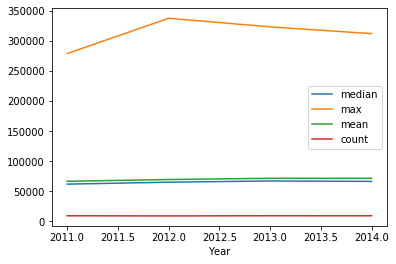

In [213]:
dr3.plot();

In [14]:
POLICE=['Sergeant','OFFICER','POLICE','Captain','Investigator','ATTORNEY','Criminalist','Examiner','Fingerprint','RESEARCH','Inspector','Fingerprint','Technician','Engineering','Assistant','Criminal','COMMISSIONER','ATTORNEY','Service','Witness']

df_POLICE = pd.DataFrame()
for i in POLICE:
    df_POLICE = df_POLICE.append(df[df['JobTitle'].str.upper().str.contains(i)])

In [215]:
df_POLICE.shape

(22056, 13)

In [15]:
dr2=df_POLICE.groupby(['Year'])['TotalPay'].agg(['median','mean','max','count']) 
dr2

,median,mean,max,count
Year,,,,
2011,120814.870,115966.838634,538909.28,6209
2012,126039.055,114474.284551,321552.11,5216
2013,131131.240,117053.714736,339282.07,5340
2014,124433.290,114062.378728,339653.70,5291


In [167]:
df_POLICE.TotalPay.describe()

count     22056.000000
mean     115420.151063
std       46513.604873
min           0.000000
25%       82042.785000
50%      125047.090000
75%      145194.680000
max      538909.280000
Name: TotalPay, dtype: float64

In [16]:
FIRE=['FIRE']

df_FIRE = pd.DataFrame()
for i in FIRE:
    df_FIRE = df_FIRE.append(df[df['JobTitle'].str.upper().str.contains(i)])

In [218]:
df_FIRE.shape

(5849, 13)

In [17]:
dr1=df_FIRE.groupby(['Year'])['TotalPay'].agg(['median','mean','max','count']) 
dr1

,median,mean,max,count
Year,,,,
2011,145118.32,146199.623626,326373.19,1445
2012,154600.38,153230.201862,362844.66,1439
2013,162498.75,160559.874473,347102.32,1460
2014,153647.23,149280.622027,335484.96,1505


In [171]:
df_FIRE.TotalPay.describe()

count      5849.000000
mean     152306.628398
std       50620.994529
min           0.000000
25%      130620.810000
50%      153963.940000
75%      181586.290000
max      362844.660000
Name: TotalPay, dtype: float64

In [133]:
dk=pd.concat([dr1,dr2,dr3],axis=1)


dk

,median,min,max,count,median,min,max,count,median,min,max,count
Year,,,,,,,,,,,,
2011,"147,765.0","22,239.4","326,373.2",1316,"123,465.9","2,230.0","538,909.3",4246,"69,178.2",839.6,"278,569.2",4327
2012,"158,027.6","25,138.3","362,844.7",1325,"128,955.8","2,084.6","249,667.7",3530,"73,693.9",312.2,"337,204.9",4042
2013,"165,918.4","19,646.6","347,102.3",1356,"136,122.4","10,376.6","262,317.8",3493,"80,213.1","1,149.8","286,416.2",4000
2014,"157,963.4","7,870.4","335,485.0",1348,"129,709.0","11,888.4","267,902.7",3545,"75,018.7","1,083.1","258,571.0",4217


СКОЛЬКО СОТРУДНИКОВ В КАЖДОМ ДЕПАРТАМЕНТЕ

In [242]:
#группировка по фио сотрудников в каждом департаменте, где дубликаты - False.
dk=df_FIRE.groupby(df_FIRE.EmployeeName.duplicated()==False).count()

#количество сотрудников относящихся к департаменту - пожарные
print('количество сотрудников относящихся к департаменту - пожарные',(dk.Id[1]+dk.Id[0]/2))


dk=df_POLICE.groupby(df_POLICE.EmployeeName.duplicated()==False).count()

#количество сотрудников относящихся к департаменту - пожарные
print('количество сотрудников относящихся к департаменту - полиция',(dk.Id[1]+dk.Id[0]/2))


dk=df_MEDICAL.groupby(df_MEDICAL.EmployeeName.duplicated()==False).count()

#количество сотрудников относящихся к департаменту - пожарные
print('количество сотрудников относящихся к департаменту - медицина',(dk.Id[1]+dk.Id[0]/2))

количество сотрудников относящихся к департаменту - пожарные 5185.0
количество сотрудников относящихся к департаменту - полиция 16437.0
количество сотрудников относящихся к департаменту - медицина 27396.0


In [246]:
dk=df_POLICE.groupby(df_POLICE.EmployeeName.duplicated()==False).count()
dk

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
EmployeeName,,,,,,,,,,,,,
False,11238,11238,11238,11212,11212,11212,9001,11238,11238,11238,0,11238,4808
True,10818,10818,10818,10722,10722,10722,6846,10818,10818,10818,0,10818,483


In [233]:
dft=df_FIRE.shape
dft[0]

5849

In [239]:
#dk.EmployeeName=='False'
dk.Id[0], dk.Id[1]

(1328, 4521)

сравним КАК ВЕДУТ СЕБЯ ЗНАЧЕНИЯ МЕЖДУ ДЕПАРТАМЕНТАМИ

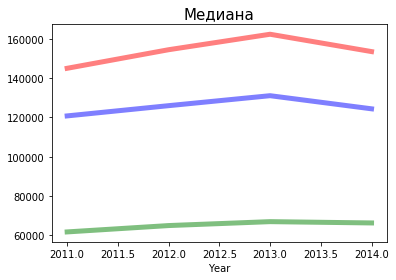

In [18]:
plt.title('Медиана', fontsize=15)
dr3['median'].plot(color='green',linewidth=5,label='медицина')
dr2['median'].plot(color='blue',linewidth=5, label='=полиция')
dr1['median'].plot(color='red',linewidth=5, label='пожарные')
plt.legend(loc='best')
plt.show();


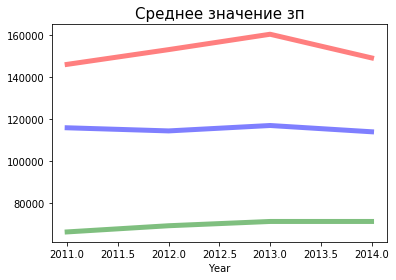

In [280]:
plt.title('Среднее значение зп', fontsize=15)
dr3['mean'].plot(color='green',linewidth=5, label='медицина')
dr2['mean'].plot(color='blue',linewidth=5, label='полиция')
dr1['mean'].plot(color='red',linewidth=5, label='пожарные')
plt.legend(loc='best')
plt.show();

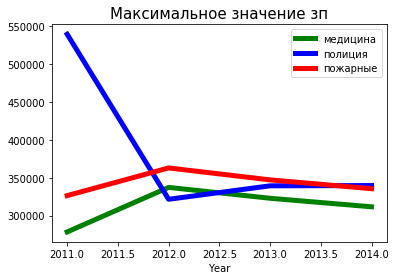

In [112]:
plt.title('Максимальное значение зп', fontsize=15)
dr3['max'].plot(color='green',linewidth=5,label='медицина')
dr2['max'].plot(color='blue',linewidth=5, label='полиция')
dr1['max'].plot(color='red',linewidth=5, label='пожарные')
plt.legend(loc='best')
plt.show();

ИНФЛЯЦИЯ

In [ ]:
Уровень инфляции в США в 2019 году составил 1,81%, что на 0,63% меньше, чем в 2018 году. 
Уровень инфляции в США в 2018 году составил 2,44%, что на 0,31% больше, чем в 2017 году.
Уровень инфляции в США в 2017 году составил 2,13%, что на 0,87% больше, чем в 2016 году.
Уровень инфляции в США в 2016 году составил 1,26%, что на 1,14% больше, чем в 2015 году. 
2014	1.62%	0.16%
2013	1.46%	-0.60%
2012	2.07%	-1.09%
2011	3.16%	1.52%
2015- 0.12

In [23]:
# данные по инфляции за необходимые года
inf=pd.DataFrame()
inf = pd.DataFrame({'YEAR': ['2011', '2012', '2013','2014'], 'Inflation Rate (%)': [3.16, 2.07, 1.46,1.62]})


In [24]:
inf

,YEAR,Inflation Rate (%)
0,2011,3.16
1,2012,2.07
2,2013,1.46
3,2014,1.62


In [113]:
dr1=df_FIRE.groupby(['Year'])['BasePay'].median() 
dr2=df_POLICE.groupby(['Year'])['BasePay'].median() 
dr3=df_MEDICAL.groupby(['Year'])['BasePay'].median() 

dr1.median

<bound method Series.median of Year
2011    105934.67
2012    110847.10
2013    116956.70
2014    112703.72
Name: BasePay, dtype: float64>

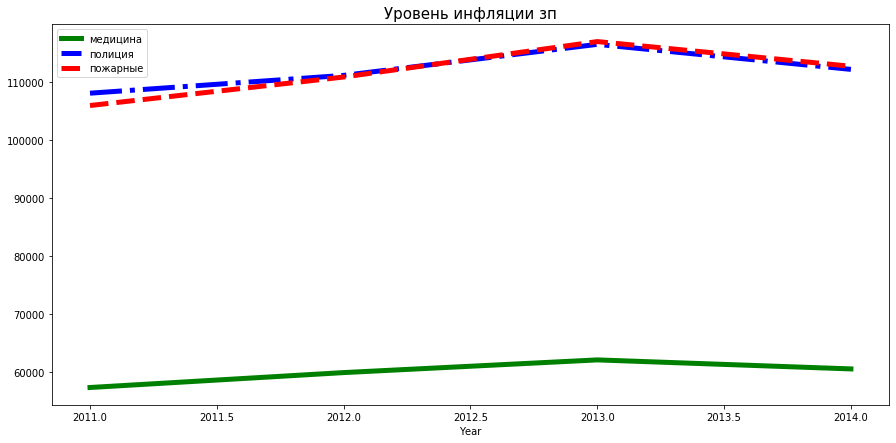

In [122]:
fig,axes=plt.subplots()
#fig.suptitle('Уровень инфляции', y = 1.2,  fontsize = 30)
#fig, axs = plt.subplots(figsize=(12, 4)); # Create an empty matplotlib Figure and Axes
#air_quality.plot.area(ax=axs); # Use pandas to put the area plot on the prepared Figure/Axes
#plt.set_ylabel("Уровень инфляции"); # Do any matplotlib customization you like
#fig.savefig("no2_concentrations.png")  # Save the Figure/Axes using the existing matplotlib method.



#inf.plot('YEAR')  # график инфляции



plt.title('Уровень инфляции зп', fontsize=15)
dr3.plot(color='green',linewidth=5, label='медицина')
dr2.plot(color='blue',linewidth=5, label='полиция',linestyle='-.')
dr1.plot(color='red',linewidth=5, label='пожарные',linestyle='--')

plt.legend(loc='best')
fig.set_figheight(7)
fig.set_figwidth(15)
plt.show()    

Как распределяются базовая оплата, сверхурочная работа и льготы между разными группами
'BasePay','OvertimePay','OtherPay'

In [254]:
df_FIRE['BasePay'].describe()

count      5345.000000
mean     113261.198614
std       26067.148122
min        6192.190000
25%      105934.660000
50%      112703.730000
75%      127456.920000
max      252423.600000
Name: BasePay, dtype: float64

In [284]:
# чтобы было лучше видно на графике, разделим на 1000
df_FIRE['BasePay1']=df_FIRE['BasePay']/1000
df_POLICE['BasePay1']=df_POLICE['BasePay']/1000
df_MEDICAL['BasePay1']=df_MEDICAL['BasePay']/1000

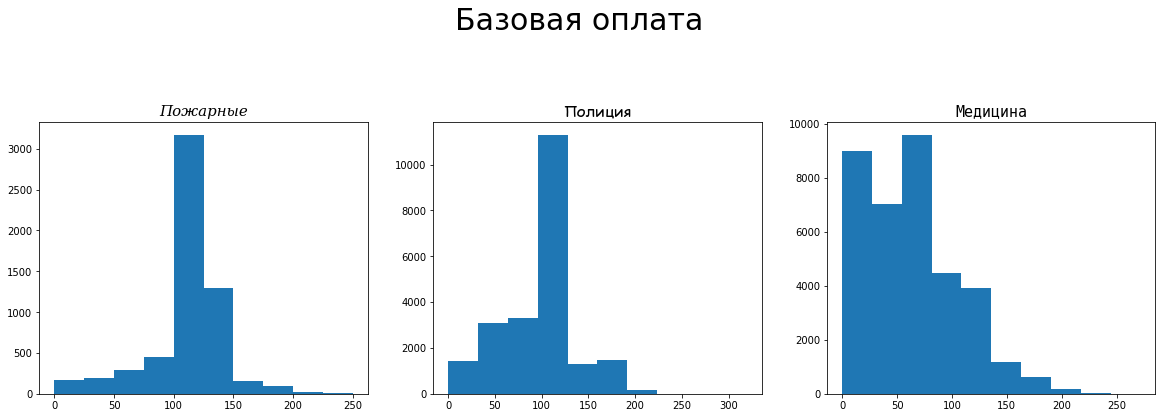

In [311]:
fig, axes =plt.subplots(1,3)

#  Заголовок области Figure:
fig.suptitle('Базовая оплата',
             y = 1.2,
             fontsize = 30)

axes[0].set_title('Пожарные',
                fontfamily = 'serif',
                fontstyle = 'italic',
                fontsize = 15)
axes[0].hist(df_FIRE['BasePay1'],range=(0,250))

axes[1].set_title('Полиция',
                fontfamily = 'fantasy',
                fontstyle = 'oblique',
                fontsize = 15)
axes[1].hist(df_POLICE['BasePay1'])

axes[2].set_title('Медицина',
                fontfamily = 'monospace',
                fontstyle = 'normal',
                fontsize = 15)
axes[2].hist(df_MEDICAL['BasePay1'])



fig.set_figheight(5)
fig.set_figwidth(20)

plt.show()



In [19]:
# чтобы было лучше видно на графике, разделим на 1000
df_FIRE['OvertimePay1']=df_FIRE['OvertimePay']/1000
df_POLICE['OvertimePay1']=df_POLICE['OvertimePay']/1000
df_MEDICAL['OvertimePay1']=df_MEDICAL['OvertimePay']/1000

print(df_FIRE['OvertimePay1'])

4         134.40160
6          92.49201
8         176.93264
9         285.26200
10        194.99939
            ...    
145729      4.23204
147556      1.06324
148021      0.68871
148209      0.45914
148554      0.07333
Name: OvertimePay1, Length: 5849, dtype: float64


In [317]:
df_FIRE['OvertimePay1'].describe()

count    5849.000000
mean      110.395201
std        31.289141
min         0.073330
25%       105.934650
50%       112.190000
75%       127.124120
max       313.686010
Name: OvertimePay1, dtype: float64

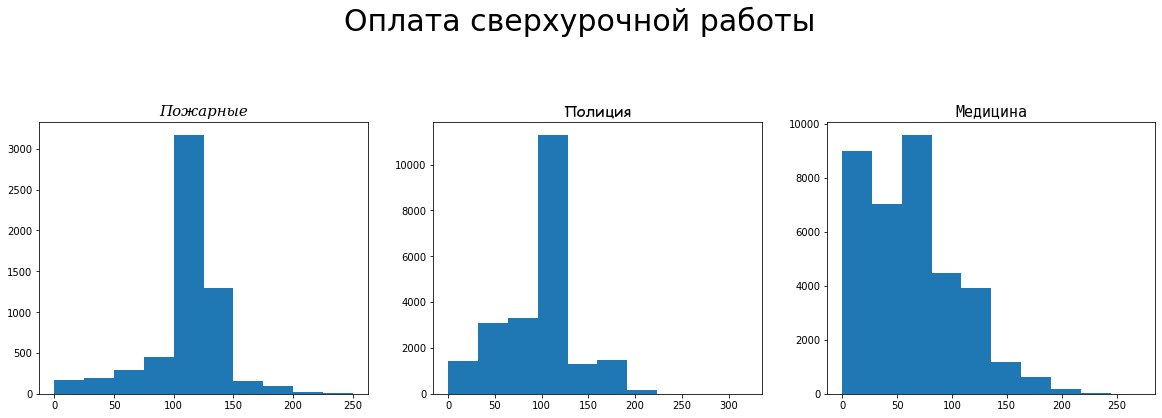

In [315]:
fig, axes =plt.subplots(1,3)


#  Заголовок области Figure:
fig.suptitle('Оплата сверхурочной работы',
             y = 1.2,
             fontsize = 30)

axes[0].set_title('Пожарные',
                fontfamily = 'serif',
                fontstyle = 'italic',
                fontsize = 15)
axes[0].hist(df_FIRE['OvertimePay1'],range=(0,250))

axes[1].set_title('Полиция',
                fontfamily = 'fantasy',
                fontstyle = 'oblique',
                fontsize = 15)
axes[1].hist(df_POLICE['OvertimePay1'])

axes[2].set_title('Медицина',
                fontfamily = 'monospace',
                fontstyle = 'normal',
                fontsize = 15)
axes[2].hist(df_MEDICAL['OvertimePay1'])



fig.set_figheight(5)
fig.set_figwidth(20)

plt.show()


In [320]:
# чтобы было лучше видно на графике, разделим на 1000
df_FIRE['OtherPay1']=df_FIRE['OtherPay']/1000
df_POLICE['OtherPay1']=df_POLICE['OtherPay']/1000
df_MEDICAL['OtherPay1']=df_MEDICAL['OtherPay']/1000

In [323]:
df_FIRE['OtherPay'].median()  #describe()

112190.0

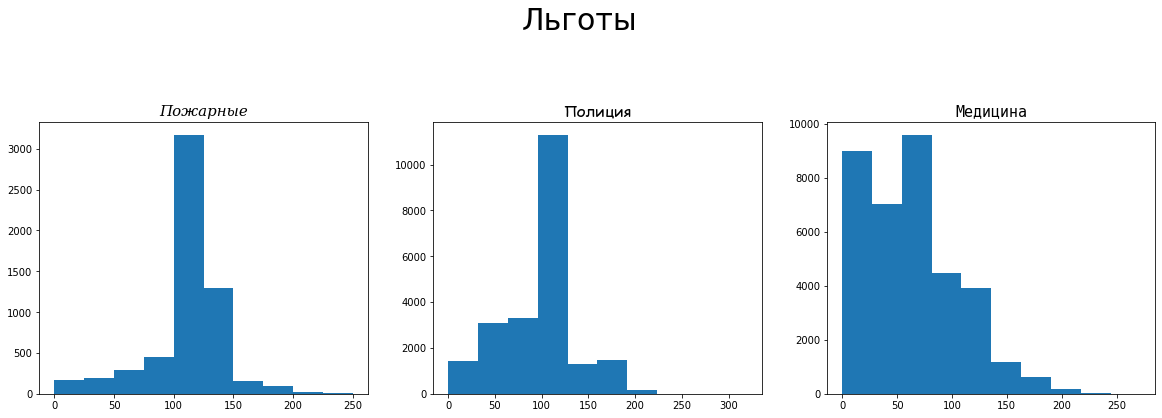

In [322]:
fig, axes =plt.subplots(1,3)

#  Заголовок области Figure:
fig.suptitle('Льготы',
             y = 1.2,
             fontsize = 30)

axes[0].set_title('Пожарные',
                fontfamily = 'serif',
                fontstyle = 'italic',
                fontsize = 15)
axes[0].hist(df_FIRE['OtherPay1'],range=(0,250))

axes[1].set_title('Полиция',
                fontfamily = 'fantasy',
                fontstyle = 'oblique',
                fontsize = 15)
axes[1].hist(df_POLICE['OtherPay1'])

axes[2].set_title('Медицина',
                fontfamily = 'monospace',
                fontstyle = 'normal',
                fontsize = 15)
axes[2].hist(df_MEDICAL['OtherPay1'])



fig.set_figheight(5)
fig.set_figwidth(20)

plt.show()


ГИСТОГРАММА С ШАГОМ 5К

In [ ]:

BasePay - 42 000 % 5 000 = 8 
[42 000 % 5 000] x 5 000 = 40 000


df.basePay.map(lambda x: x ...)



In [23]:
#fig, axes =plt.subplots()
data = df_FIRE.BasePay
#print(min(data), max(data))
sd=(data-min(data))%5000
ds=(min(data)%5000)*5000

#plt.hist(data, bins = np.arange(min(data), max(data) + 1, 1))
plt.hist(data, bins = np.arange(sd, ds + 1, 1))
plt.show()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

На базе линейной регрессии  прогноз по должности CLINICAL NURSE SPECIALIST

In [66]:

df_NURSE = pd.DataFrame()
df_NURSE = df_NURSE.append(df[df['JobTitle'].str.upper().str.contains('CLINICAL NURSE SPECIALIST')])

In [84]:
df_NURSE

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
939,940,AMALIA FYLES,CLINICAL NURSE SPECIALIST,"169,572.0","169,572.0","169,572.0",NaN,"171,566.8","171,566.8",2011,nan,San Francisco,NaN
948,949,SHERYL CALSON,CLINICAL NURSE SPECIALIST,"169,572.0","169,572.0","169,572.0",NaN,"171,093.4","171,093.4",2011,nan,San Francisco,NaN
995,996,ANTIONETTE GRIFFIN,CLINICAL NURSE SPECIALIST,"169,572.1","169,572.1","169,572.1",NaN,"169,822.1","169,822.1",2011,nan,San Francisco,NaN
996,997,KATHERINE MAH,CLINICAL NURSE SPECIALIST,"169,572.1","169,572.1","169,572.1",NaN,"169,822.1","169,822.1",2011,nan,San Francisco,NaN
997,998,CHRISTINE DAVENPORT,CLINICAL NURSE SPECIALIST,"169,572.0","169,572.0","169,572.0",NaN,"169,822.0","169,822.0",2011,nan,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113325,113326,Kelly M Brandon,Clinical Nurse Specialist,"148,917.1","148,917.1","148,917.1","50,137.0","149,222.0","199,359.0",2014,nan,San Francisco,FT
113733,113734,Andre M Michaud,Clinical Nurse Specialist,"145,718.4","145,718.4","145,718.4","48,626.9","145,968.4","194,595.3",2014,nan,San Francisco,FT
115119,115120,Grace Y Chen,Clinical Nurse Specialist,"131,152.0","131,152.0","131,152.0","45,895.2","133,708.1","179,603.3",2014,nan,San Francisco,FT
118268,118269,Laurie J Agrillo,Clinical Nurse Specialist,"114,920.7","114,920.7","114,920.7","39,213.4","115,170.7","154,384.1",2014,nan,San Francisco,PT


In [130]:
df_NURSE.groupby(['Year'])['BasePay'].agg(['mean','count']) 

,mean,count
Year,,
2011,"129,609.3",26
2012,"148,740.1",24
2013,"166,814.7",20
2014,"164,540.0",21


In [ ]:
df_NURSE.drop('Benefits', axis=1, inplace=True)
df_NURSE.drop('Notes', axis=1, inplace=True)
df_NURSE.drop('Status', axis=1, inplace=True)
df_NURSE.drop('Agency', axis=1, inplace=True)

In [116]:
df_NURSE.drop('JobTitle', axis=1, inplace=True)
df_NURSE.drop('EmployeeName', axis=1, inplace=True)

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [123]:
# удалим доплату OtherPay
X_train, X_test, y_train, y_test = train_test_split(df_NURSE.drop('OtherPay',axis=1), df_NURSE['OtherPay'], test_size=0.25, random_state=27)

In [124]:
y_train

73817    178,436.0
80937    122,467.4
3402     136,049.1
36903    173,480.0
36726    178,403.9
            ...   
118268   114,920.7
36830    178,968.0
111208   188,928.0
73779    186,666.0
5478     115,148.7
Name: OtherPay, Length: 68, dtype: float64

In [109]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69 entries, 112781 to 5478
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                69 non-null     int64  
 1   EmployeeName      69 non-null     object 
 2   JobTitle          69 non-null     object 
 3   BasePay           68 non-null     float64
 4   OvertimePay       68 non-null     float64
 5   TotalPay          69 non-null     float64
 6   TotalPayBenefits  69 non-null     float64
 7   Year              69 non-null     int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 4.9+ KB


In [126]:
# линейная регрессия
reg = LinearRegression().fit(X_train, y_train)
pred = reg.predict(X_test)

print(mean_squared_error(y_test, pred, squared=True))  # что было - True и что стало, находим среднеквадратичное 
# метод mean_squared_error

1.7861346931231986e-21


In [122]:
df_NURSE.isna().sum() 

Id                  0
BasePay             0
OvertimePay         0
OtherPay            0
TotalPay            0
TotalPayBenefits    0
Year                0
dtype: int64

In [121]:
#df_NURSE.fillna(df_NURSE.BasePay.median(),inplace = True) 
df_NURSE.dropna(inplace = True) # удаление строк nan значения

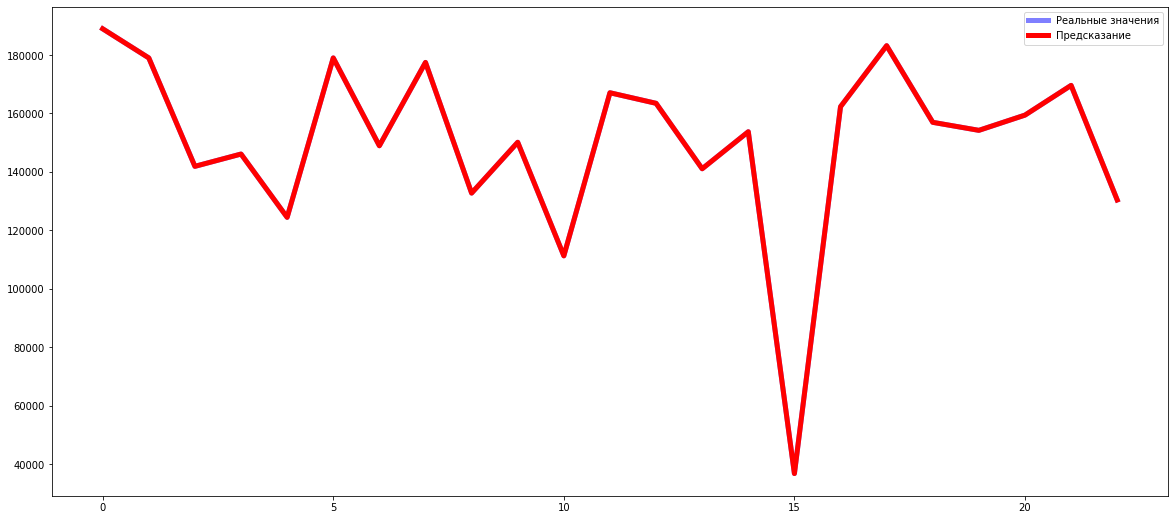

In [129]:
# посмотрим насколько идеальна модель -  совпадает
plt.figure(figsize=(20,9))
plt.plot(y_test.values, "blue",linewidth=5, label='Реальные значения', alpha=0.5)
plt.plot(pred, "red",linewidth=5, label='Предсказание')
plt.legend(loc='best')
plt.show()

In [16]:
pd.set_option('display.max_columns', 300)

In [17]:
df1 = pd.read_csv('inflation.csv', delimiter=';')

In [18]:
df1

,"Data Source,""World Development Indicators"","
0,"Last Updated Date,""2021-06-30"","
1,"Country Name,""Country Code"",""Indicator Name"",""..."
2,"Aruba,""ABW"",""Inflation, consumer prices (annua..."
3,"Africa Eastern and Southern,""AFE"",""Inflation, ..."
4,"Afghanistan,""AFG"",""Inflation, consumer prices ..."
...,...
263,"Kosovo,""XKX"",""Inflation, consumer prices (annu..."
264,"Yemen, Rep.,""YEM"",""Inflation, consumer prices ..."
265,"South Africa,""ZAF"",""Inflation, consumer prices..."
266,"Zambia,""ZMB"",""Inflation, consumer prices (annu..."


In [ ]:
ДАЛЬШЕ НЕ ЧИТАТЬ! РАБОЧИЕ МОМЕНТЫ

In [ ]:
Status
Nan - незаполненное значение
Pt- part time
Ft - full time

In [255]:
k=df['JobTitle'].value_counts()  #500
k[50:100]

Food Service Worker                     544
PUBLIC SERVICE AIDE-SPECIAL PROGRAMS    531
Librarian 1                             529
Truck Driver                            522
Pr Administrative Analyst               511
Assoc Engineer                          505
Public SafetyComm Disp                  470
Engineer                                469
POLICE OFFICER I                        466
HSA Sr Eligibility Worker               465
Asst Engr                               459
Stationary Eng, Sewage Plant            450
Senior Account Clerk                    438
Health Worker 3                         438
Electronic Maintenance Tech             430
Automotive Mechanic                     430
StdntDsgnTrain1, Arch/Eng/Plng          415
Manager III                             415
Health Worker 2                         415
Manager II                              394
Physician Specialist                    389
Manager I                               388
Senior Physician Specialist     

In [ ]:
 mode = "access"
>>> allowed_modes =["access", "read", "write"]
>>> 
>>> def f1():
...    mode in allowed_modes
... 
>>> def f2():
...    any(mode == x for x in allowed_modes)

In [47]:
data = pd.DataFrame({'MEDICAL':['PATIENT','PARAMEDIC','MEDICAL','NURSE','MENTAL','HEALTH','PHYSICIAN','PSYCHIATRIC','NURSING','HOSPITAL','PHYSICAL','THERAP','PHARMAC','PSYCHOLOGIST','X-RAY','NUTRITIONIST','DIETITIAN','ANESTHETIST','EPIDEMIOLOGIST','DENTAL','CLINICAL','REHABILITATION','HLTH','PATHOLOGIST','DISEASE','CARE','SURGICAL','DENTIST','MORGUE','REHABILITATION','PATIENT','MED STAFF','EPIDEMIOLOGIST'],
                     'POLICE':['Sergeant','OFFICER','POLICE','Captain','Investigator','ATTORNEY','Criminalist','Examiner','Fingerprint','RESEARCH','Inspector','Fingerprint','Technician','Engineering','Assistant','Criminal','COMMISSIONER','ATTORNEY','Service','Witness'],
                     'FIRE':['FIRE']
                    })
#print(data[data['Type'].str.contains('Fruit')])
data

ValueError: arrays must all be same length

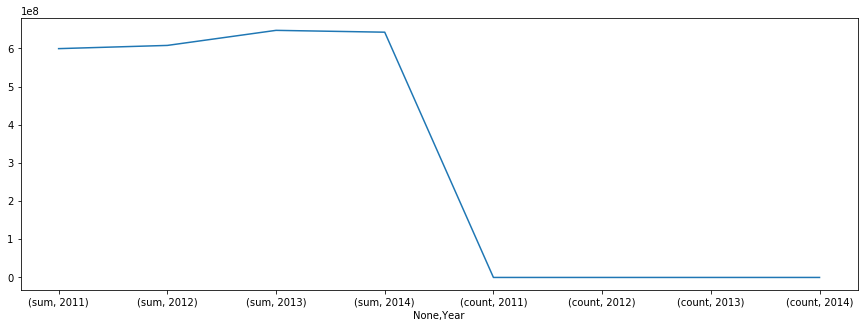

In [275]:
plt.figure(figsize=(15,5))
#plt.plot(dk.TotalPay,dk.Year, "blue",linewidth=5, label='полиция', alpha=0.5)
#plt.plot(df_df.TotalPay, "red",linewidth=5, label='пожарные')
dk.unstack().plot()
#plt.plot(dk.sum,dk.count,linewidth=5, label='медицина',alpha=0.5)

In [31]:
del df['Benefits']


In [35]:
df.drop('Agency', axis=1, inplace=True)

In [85]:
df.drop('Notes',axis=1)


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,167411.18,167411.18,65258,567595.43,567595.43,2011,San Francisco,65258
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,155966.02,155966.02,65258,538909.28,538909.28,2011,San Francisco,65258
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,212739.13,212739.13,65258,335279.91,335279.91,2011,San Francisco,65258
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,77916.00,77916.00,65258,332343.61,332343.61,2011,San Francisco,65258
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,134401.60,134401.60,65258,326373.19,326373.19,2011,San Francisco,65258
...,...,...,...,...,...,...,...,...,...,...,...,...
148613,148614,Nanette M Lloyd,Special Nurse,19.97,19.97,19.97,4.30,19.97,24.27,2014,San Francisco,PT
148616,148617,Afakasi O Afakasi,Public Service Trainee,21.48,21.48,21.48,0.22,22.34,22.56,2014,San Francisco,PT
148617,148618,Charles F Williams Iii,Pool Lifeguard,17.26,17.26,17.26,4.04,17.26,21.30,2014,San Francisco,PT
148619,148620,Ian V Cameron,IS Program Analyst-Assistant,6.04,6.04,6.04,2.30,16.09,18.39,2014,San Francisco,PT


In [86]:
df_dd.drop('Benefits',axis=1) # удаление столбцов нулевого значения



NameError: name 'df_dd' is not defined

In [26]:
df_dd=df_d.copy()

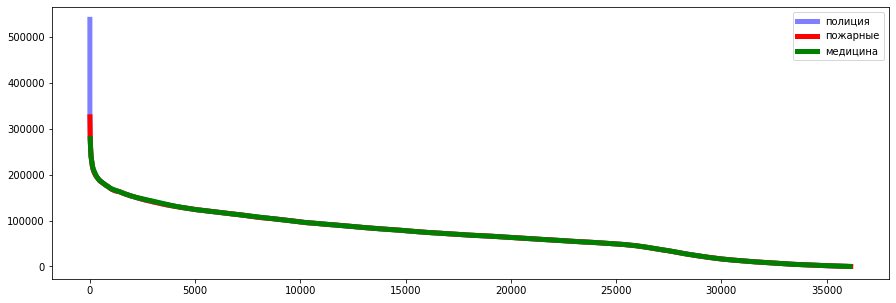

In [118]:

plt.figure(figsize=(15,5))
plt.plot(df_d.TotalPay, "blue",linewidth=5, label='полиция', alpha=0.5)
plt.plot(df_df.TotalPay, "red",linewidth=5, label='пожарные')
plt.plot(df_dfm.TotalPay, "green",linewidth=5, label='медицина')
plt.legend(loc='best')
plt.show()

In [26]:
df_d.groupby(['JobTitle','TotalPay'])['Year'].count()

JobTitle                                    TotalPay 
ASSISTANT INSPECTOR (POLICE DEPARTMENT)     188999.20    1
ASSISTANT INSPECTOR II (POLICE DEPARTMENT)  129913.87    1
                                            142484.42    1
                                            143844.45    1
                                            149776.31    1
                                                        ..
SERGEANT III (POLICE DEPARTMENT)            207277.85    1
                                            209213.81    1
                                            210076.88    1
                                            212179.09    1
                                            214944.74    1
Name: Year, Length: 667, dtype: int64

In [72]:
print('Среднее значение по зп:\n','полиция',df_d.groupby(['Year'])['TotalPay'].mean());
print('\n','пожарные',df_df.groupby(['Year'])['TotalPay'].mean());
print('\n','медицина',df_dfm.groupby(['Year'])['TotalPay'].mean());

Среднее значение по зп:
 полиция Year
2011    127097.17166
Name: TotalPay, dtype: float64

 пожарные Year
2011    62462.845916
Name: TotalPay, dtype: float64

 медицина Year
2011    62462.845916
Name: TotalPay, dtype: float64


In [73]:
print('Максимальное значение по зп:\n','полиция',df_d.groupby(['Year'])['TotalPay'].max());
print('\n','пожарные',df_df.groupby(['Year'])['TotalPay'].max());
print('\n','медицина',df_dfm.groupby(['Year'])['TotalPay'].max());

Среднее значение по зп:
 полиция Year
2011    538909.28
Name: TotalPay, dtype: float64

 пожарные Year
2011    278569.21
Name: TotalPay, dtype: float64

 медицина Year
2011    278569.21
Name: TotalPay, dtype: float64


In [74]:
print('Медиана по зп:\n','полиция',df_d.groupby(['Year'])['TotalPay'].median());
print('\n','пожарные',df_df.groupby(['Year'])['TotalPay'].median());
print('\n','медицина',df_dfm.groupby(['Year'])['TotalPay'].median());

Среднее значение по зп:
 полиция Year
2011    127177.465
Name: TotalPay, dtype: float64

 пожарные Year
2011    55376.42
Name: TotalPay, dtype: float64

 медицина Year
2011    55376.42
Name: TotalPay, dtype: float64


In [ ]:
#Как распределяются базовая оплата, сверхурочная работа и льготы между разными группами?

In [86]:
print('базовая оплата\n','полиция',df_d.BasePay,'\n','пожарные',df_df.BasePay,'\n','медицина',df_dfm.BasePay)
      
print('\n','пожарные',df_df.groupby(['Year'])['TotalPay'].median());
print('\n','медицина',df_dfm.groupby(['Year'])['TotalPay'].median());

print('Среднее значение по зп:\n','полиция',df_d.groupby(['Year'])['TotalPay'].median());
print('\n','пожарные',df_df.groupby(['Year'])['TotalPay'].median());
print('\n','медицина',df_dfm.groupby(['Year'])['TotalPay'].median());

print('Среднее значение по зп:\n','полиция',df_d.groupby(['Year'])['TotalPay'].median());
print('\n','пожарные',df_df.groupby(['Year'])['TotalPay'].median());
print('\n','медицина',df_dfm.groupby(['Year'])['TotalPay'].median());

базовая оплата
 полиция 1        155966
2        212739
11        99722
15       198778
25       256470
          ...  
35131    1006.4
35151         0
35318         0
35671         0
35902         0
Name: BasePay, Length: 2512, dtype: object 
 пожарные 17       140547
19       257511
20       257510
21       257510
36       245124
          ...  
35392         0
35597         0
35732     516.4
35764         0
36115         0
Name: BasePay, Length: 431, dtype: object 
 медицина 17       140547
19       257511
20       257510
21       257510
36       245124
          ...  
35392         0
35597         0
35732     516.4
35764         0
36115         0
Name: BasePay, Length: 431, dtype: object

 пожарные Year
2011    55376.42
Name: TotalPay, dtype: float64

 медицина Year
2011    55376.42
Name: TotalPay, dtype: float64
Среднее значение по зп:
 полиция Year
2011    127177.465
Name: TotalPay, dtype: float64

 пожарные Year
2011    55376.42
Name: TotalPay, dtype: float64

 медицина Year
201

In [12]:
kol=0
for kol in df.JobTitle:
    k=df.JobTitle[kol]
    print(k)

      #url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={page}&per_page={num_per_page}&area={113}'
    #res = requests.get(url)
    #vacancies = res.json()
    snippet_r = ['DEPARTMENT' for el in df.JobTitle] 
    #snippet_r = [el.get('snippet') for el in vacancies.get('items')] 
    #for elem in snippet_r:
     #   df1=elem.get('requirement')
     #   df2=elem.get('responsibility')
    

#l = df['JobTitle'].str.contains("POLICE").values()#.str.rfind("POLICE") #.upper()
#l
#print(l)
#sub=['%DEPARTMENT%']
#long_df["Indexes"] = l.str.rfind(sub)
#k= pd.to_numeric(long_df["Indexes"])
#print(k)
#sd=df[df['JobTitle'].isin(sub)]

#zips = ['3012\d+','152193']
#pat = r'\b(?:{})\b'.format('|'.join(sub))

#sd=df[df['JobTitle'].str.contains(pat)]


#if any(df['JobTitle'] in 'DEPARTMENT' for df['JobTitle'] in df):

#if k!=1:
#    long_df = pd.melt(df, var_name='Item', value_name='Sales',id_vars=['JobTitle', 'BasePay','TotalPay', 'OvertimePay', 'Year', 'Status'])
    

#sd

#print(k1)


#if JobTitle=='DEPARTMENT'

#long_df = pd.melt(df, var_name='Item', value_name='Sales',
#            id_vars=['age', 'gender','ml_balance', 'cl_balance_0m', 'td_balance_0m', 'casa_balance_0m', 'nbi'])
#long_df.shape         
#long_df.sample(n=5) 

KeyError: 'GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY'

In [ ]:
data.dropna(inplace = True) # удаление столбцов нулевого значения

# из поля вытаскиваем строки
skil=weq.get('skils')
weq['skils']=[','.join([y.get('name') for y in x]) for x in skil]
tabl_new =pd.DataFrame(weq)
tabl_new

In [22]:
JobTitle_by=df.groupby('JobTitle')['TotalPay'].sum() #  групировка по должностям, 
JobTitle_by.head(20)

JobTitle
ACCOUNT CLERK                                         3654960.14
ACCOUNTANT                                             237146.34
ACCOUNTANT INTERN                                     1393523.66
ACPO,JuvP, Juv Prob (SFERS)                             62290.78
ACUPUNCTURIST                                           67594.40
ADMINISTRATIVE ANALYST                                5947802.68
ADMINISTRATIVE ANALYST II                              122994.07
ADMINISTRATIVE ANALYST III                             185397.03
ADMINISTRATIVE ENGINEER                               1279614.30
ADMINISTRATIVE SERVICES MANAGER                        231046.74
ADMINISTRATOR, SFGH MEDICAL CENTER                     257124.44
AFFIRMATIVE ACTION SPECIALIST                          409283.90
AGRICULTURAL INSPECTOR                                 107172.20
AIRPORT ASSISTANT DEPUTY DIRECTOR, BUSINESS ADMINI       1927.50
AIRPORT ASSISTANT DEPUTY DIRECTOR, OPERATIONS           15420.00
AIRPORT COMMUNIC

In [12]:
df['JobTitle']

0         GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY
1                        CAPTAIN III (POLICE DEPARTMENT)
2                        CAPTAIN III (POLICE DEPARTMENT)
3                   WIRE ROPE CABLE MAINTENANCE MECHANIC
4           DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)
                               ...                      
148649                                         Custodian
148650                                      Not provided
148651                                      Not provided
148652                                      Not provided
148653                        Counselor, Log Cabin Ranch
Name: JobTitle, Length: 148654, dtype: object